In [ ]:
import os

os.system('jupyter nbconvert --to html Ch2-statlearn-lab_HW2.ipynb')

In [1]:
import pandas as pd   #import pandas
col_names = ['Year','CommodityCode','CropName','CountyCode','County','HarvestedAcres','Yield','Production','Price','Unit','Value']
wine = pd.read_csv('./California_Wine.csv', header=0, names=col_names)

C:\Users\julia\AppData\Local\Temp\ipykernel_6464\1712582127.py:3: DtypeWarning: Columns (2,4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  wine = pd.read_csv('./California_Wine.csv', header=0, names=col_names)


In [2]:
from sklearn import linear_model
import numpy as np
import math

wine.head()

,Year,CommodityCode,CropName,CountyCode,County,HarvestedAcres,Yield,Production,Price,Unit,Value
0,2012.0,216299.0,GRAPESWINE,77.0,SanJoaquin,109000.0,8.18,892000.0,605.72,Tons,540303000.0
1,2014.0,216299.0,GRAPESWINE,77.0,SanJoaquin,102000.0,8.00,816000.0,590.00,Tons,481440000.0
2,2017.0,216299.0,GRAPESWINE,77.0,SanJoaquin,98100.0,6.79,666000.0,593.91,Tons,395541000.0
3,2016.0,216299.0,GRAPESWINE,77.0,SanJoaquin,98000.0,7.31,716000.0,594.67,Tons,425781000.0
4,2015.0,216299.0,GRAPESWINE,77.0,SanJoaquin,97900.0,6.23,610000.0,576.15,Tons,351453000.0


In [3]:
wine.isna().sum()

Year              1047261
CommodityCode     1047261
CropName          1047261
CountyCode        1047261
County            1047261
HarvestedAcres    1047273
Yield             1047310
Production        1047298
Price             1047298
Unit              1047297
Value             1047261
dtype: int64

In [4]:
wine= wine.dropna()
wine.isna().sum()

Year              0
CommodityCode     0
CropName          0
CountyCode        0
County            0
HarvestedAcres    0
Yield             0
Production        0
Price             0
Unit              0
Value             0
dtype: int64

In [5]:
wine = wine.drop(['CommodityCode','CropName','Unit'], axis=1)
wine.head()

,Year,CountyCode,County,HarvestedAcres,Yield,Production,Price,Value
0,2012.0,77.0,SanJoaquin,109000.0,8.18,892000.0,605.72,540303000.0
1,2014.0,77.0,SanJoaquin,102000.0,8.00,816000.0,590.00,481440000.0
2,2017.0,77.0,SanJoaquin,98100.0,6.79,666000.0,593.91,395541000.0
3,2016.0,77.0,SanJoaquin,98000.0,7.31,716000.0,594.67,425781000.0
4,2015.0,77.0,SanJoaquin,97900.0,6.23,610000.0,576.15,351453000.0


In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt

wine.corr()

,Year,CountyCode,HarvestedAcres,Yield,Production,Price,Value
Year,1.000000,-0.006814,0.097843,0.027181,0.080324,0.297571,0.259964
CountyCode,-0.006814,1.000000,0.022752,-0.032765,-0.076189,0.055267,0.095741
HarvestedAcres,0.097843,0.022752,1.000000,0.385447,0.898370,0.045556,0.740578
Yield,0.027181,-0.032765,0.385447,1.000000,0.570541,-0.323009,0.140452
Production,0.080324,-0.076189,0.898370,0.570541,1.000000,-0.165352,0.535070
Price,0.297571,0.055267,0.045556,-0.323009,-0.165352,1.000000,0.267045
Value,0.259964,0.095741,0.740578,0.140452,0.535070,0.267045,1.000000


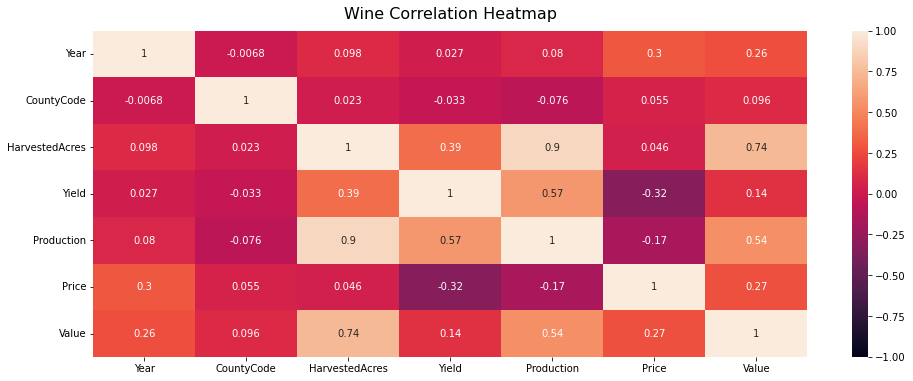

In [7]:

plt.figure(figsize=(16,6))

heatmap = sns.heatmap(wine.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Wine Correlation Heatmap', fontdict={'fontsize':16},pad=12);

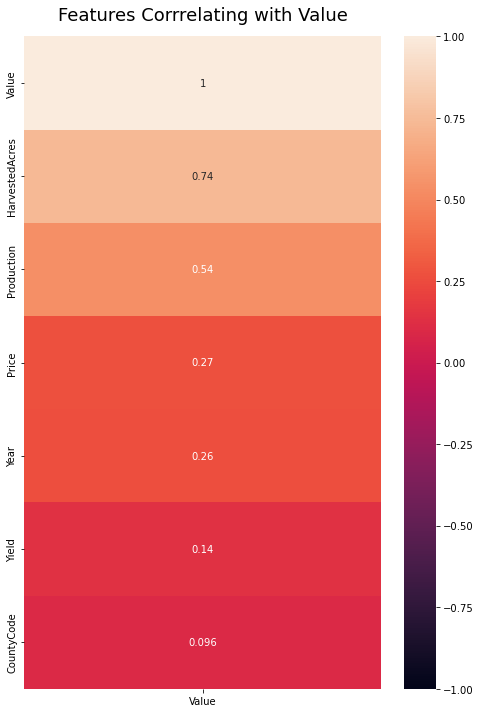

In [8]:
plt.figure(figsize=(8,12))
heatmap= sns.heatmap(wine.corr()[['Value']].sort_values(by='Value', ascending=False), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Features Corrrelating with Value', fontdict={'fontsize':18}, pad=16);

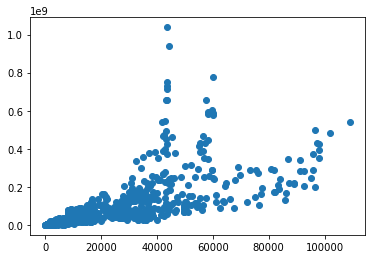

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

Harvested_data = wine['HarvestedAcres']
Value_data = wine['Value']

plt.scatter(Harvested_data, Value_data)
plt.show()

In [10]:
import statsmodels.api as sm
Value_data = sm.add_constant(Value_data)

regression1 = sm.OLS(Harvested_data,Value_data).fit()

import statsmodels.formula.api as smf
regression2 = smf.ols(formula =\
    ' Value ~ HarvestedAcres',\
    data = wine).fit()

#regression1.summary()

print(regression2.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     1524.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          6.41e-219
Time:                        17:13:59   Log-Likelihood:                -24592.
No. Observations:                1257   AIC:                         4.919e+04
Df Residuals:                    1255   BIC:                         4.920e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.706e+05   2.65e+06     -0.

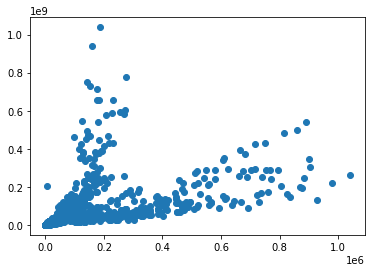

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

Production_data = wine['Production']
Value_data = wine['Value']

plt.scatter(Production_data, Value_data)
plt.show()

In [12]:
import statsmodels.api as sm
Value_data = sm.add_constant(Value_data)

regression1 = sm.OLS(Production_data, Value_data).fit()

import statsmodels.formula.api as smf
regression2 = smf.ols(formula =\
    'Value ~ Production',\
    data = wine).fit()

#regression1.summary()

print(regression2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     503.4
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           5.06e-94
Time:                        17:14:00   Log-Likelihood:                -24879.
No. Observations:                1257   AIC:                         4.976e+04
Df Residuals:                    1255   BIC:                         4.977e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.413e+07   3.14e+06      7.675      0.0

In [13]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler() #scaling applied 

scaler.fit_transform(wine[['Production', 'Value']]) 

array([[8.57604643e-01, 5.20214284e-01],
       [7.84532076e-01, 4.63537992e-01],
       [6.40309905e-01, 3.80830062e-01],
       ...,
       [3.55748023e-05, 2.90780972e-05],
       [5.38429440e-05, 4.37134309e-05],
       [3.55748023e-05, 3.02335183e-05]])

In [14]:
import matplotlib.pyplot as plt

feature_cols = ['Year','CountyCode','HarvestedAcres','Yield','Production','Price']

X = wine[feature_cols] # Features
y = wine['Value'] # Target variable

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [16]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

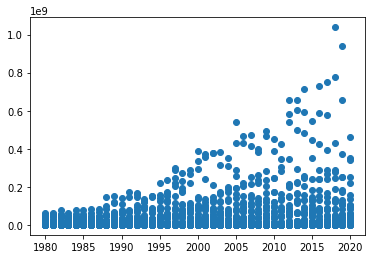

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

Year_data = wine['Year']
Value_data = wine['Value']

plt.scatter(Year_data, Value_data)
plt.show()

In [18]:
import statsmodels.api as sm
Value_data = sm.add_constant(Value_data)

regression1 = sm.OLS(Year_data,Value_data).fit()

import statsmodels.formula.api as smf
regression2 = smf.ols(formula =\
    'Value ~ Year',\
    data = wine).fit()

#regression1.summary()

print(regression2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     90.96
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           7.31e-21
Time:                        17:14:00   Log-Likelihood:                -25047.
No. Observations:                1257   AIC:                         5.010e+04
Df Residuals:                    1255   BIC:                         5.011e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.926e+09   5.23e+08     -9.421      0.0

In [19]:
import statsmodels.api as sm
Value_data = sm.add_constant(Value_data)

#regression5 = sm.OLS(Harvested_data, Production_data).fit()

import statsmodels.formula.api as smf
regression3 = smf.ols(formula =\
    'Value ~ HarvestedAcres + Production',\
    data = wine).fit()

#regression1.summary()

print(regression3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     1097.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          3.35e-276
Time:                        17:14:00   Log-Likelihood:                -24456.
No. Observations:                1257   AIC:                         4.892e+04
Df Residuals:                    1254   BIC:                         4.893e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.138e+06   2.39e+06     -1.

In [20]:
import statsmodels.api as sm
Value_data = sm.add_constant(Value_data)

#regression5 = sm.OLS(Harvested_data, Production_data).fit()

import statsmodels.formula.api as smf
regression3 = smf.ols(formula =\
    'Value ~ HarvestedAcres + Production + Price',\
    data = wine).fit()

#regression1.summary()

print(regression3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     768.1
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          2.82e-283
Time:                        17:14:00   Log-Likelihood:                -24436.
No. Observations:                1257   AIC:                         4.888e+04
Df Residuals:                    1253   BIC:                         4.890e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.311e+07   2.74e+06     -4.

In [21]:
import statsmodels.api as sm
Value_data = sm.add_constant(Value_data)

#regression5 = sm.OLS(Harvested_data, Production_data).fit()

import statsmodels.formula.api as smf
regression3 = smf.ols(formula =\
    'Value ~ HarvestedAcres + Production + Price + Year + CountyCode + Yield',\
    data = wine).fit()

#regression1.summary()

print(regression3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     428.9
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          3.10e-299
Time:                        17:14:01   Log-Likelihood:                -24389.
No. Observations:                1257   AIC:                         4.879e+04
Df Residuals:                    1250   BIC:                         4.883e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.201e+09   3.29e+08     -9.

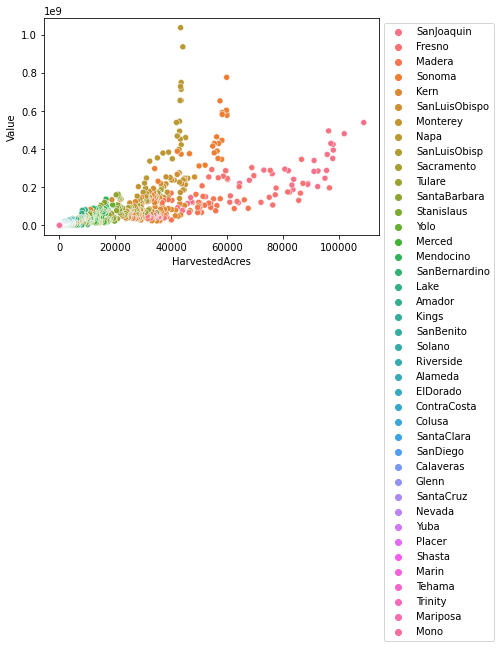

In [22]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.scatterplot(x='HarvestedAcres', y='Value',
                hue='County', data=wine, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

In [23]:
import numpy as np
Y = wine['HarvestedAcres']
mean = np.mean(Y)

print(mean)



  


14905.651551312649


In [25]:
import pandas as pd
a = (2020)

def diff(a, b):
    return b - a

wine_recency = wine.groupby(by='County',
                        as_index=False)['Year'].max()
wine_recency.columns = ['County', 'LastYearRecorded']
recent_year = wine_recency['LastYearRecorded'].max()
wine_recency['Recency'] = wine_recency['LastYearRecorded'].apply(
    lambda x: (recent_year - x))


wine_recency.head()
wine_recency

,County,LastYearRecorded,Recency
0,Alameda,2020.0,0.0
1,Amador,2020.0,0.0
2,Calaveras,2020.0,0.0
3,Colusa,2020.0,0.0
4,ContraCosta,2020.0,0.0
5,ElDorado,2020.0,0.0
6,Fresno,2020.0,0.0
7,Glenn,1983.0,37.0
8,Kern,2020.0,0.0
9,Kings,2020.0,0.0


In [27]:

wine_frequency = wine.drop_duplicates().groupby(
    by=['County'], as_index=False)['HarvestedAcres'].max()
wine_frequency.columns = ['County','FrequencyofAcres']
mean_acres = wine_frequency['FrequencyofAcres'].max()
wine_frequency['Mean Comparison'] = wine_frequency['FrequencyofAcres'].apply(
    lambda wine: (wine - mean))
wine_frequency.head()
wine_frequency

,County,FrequencyofAcres,Mean Comparison
0,Alameda,3390.0,-11515.651551
1,Amador,5360.0,-9545.651551
2,Calaveras,910.0,-13995.651551
3,Colusa,2460.0,-12445.651551
4,ContraCosta,2550.0,-12355.651551
5,ElDorado,2670.0,-12235.651551
6,Fresno,96692.0,81786.348449
7,Glenn,875.0,-14030.651551
8,Kern,49716.0,34810.348449
9,Kings,4800.0,-10105.651551


In [50]:
wine['Total'] = wine['Value']
monetary_wine = wine.groupby(by='County', as_index=False)['Total'].sum()
monetary_wine.columns = ['County', 'Monetary']
monetary_wine.head(40)

,County,Monetary
0,Alameda,3.542566e+08
1,Amador,3.798864e+08
2,Calaveras,5.728440e+07
3,Colusa,1.072820e+08
4,ContraCosta,6.405100e+07
5,ElDorado,1.634070e+08
6,Fresno,6.343058e+09
7,Glenn,1.772000e+06
8,Kern,2.935242e+09
9,Kings,3.148069e+08


In [29]:
rf_wine = wine_recency.merge(wine_frequency, on='County')
rfm_wine = rf_wine.merge(monetary_wine, on='County').drop(
    columns='LastYearRecorded')
rfm_wine.head()

,County,Recency,FrequencyofAcres,Mean Comparison,Monetary
0,Alameda,0.0,3390.0,-11515.651551,354256600.0
1,Amador,0.0,5360.0,-9545.651551,379886384.0
2,Calaveras,0.0,910.0,-13995.651551,57284400.0
3,Colusa,0.0,2460.0,-12445.651551,107282000.0
4,ContraCosta,0.0,2550.0,-12355.651551,64051000.0


In [49]:
rfm_wine['R_rank'] = rfm_wine['Recency'].rank(ascending=False)
rfm_wine['F_rank'] = rfm_wine['Mean Comparison'].rank(ascending=True)
rfm_wine['M_rank'] = rfm_wine['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_wine['R_rank_norm'] = (rfm_wine['R_rank']/rfm_wine['R_rank'].max())*100
rfm_wine['F_rank_norm'] = (rfm_wine['F_rank']/rfm_wine['F_rank'].max())*100
rfm_wine['M_rank_norm'] = (rfm_wine['F_rank']/rfm_wine['M_rank'].max())*100
 
rfm_wine.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_wine.head(41)

,County,Recency,FrequencyofAcres,Mean Comparison,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,County_segment
0,Alameda,0.0,3390.0,-11515.65,3.542566e+08,100.000000,43.902439,43.902439,2.62,Low Value County
1,Amador,0.0,5360.0,-9545.65,3.798864e+08,100.000000,56.097561,56.097561,3.13,Medium Value County
2,Calaveras,0.0,910.0,-13995.65,5.728440e+07,100.000000,29.268293,29.268293,1.99,Low Value County
3,Colusa,0.0,2460.0,-12445.65,1.072820e+08,100.000000,36.585366,36.585366,2.30,Low Value County
4,ContraCosta,0.0,2550.0,-12355.65,6.405100e+07,100.000000,39.024390,39.024390,2.41,Low Value County
5,ElDorado,0.0,2670.0,-12235.65,1.634070e+08,100.000000,41.463415,41.463415,2.51,Low Value County
6,Fresno,0.0,96692.0,81786.35,6.343058e+09,100.000000,97.560976,97.560976,4.90,Top County
7,Glenn,37.0,875.0,-14030.65,1.772000e+06,4.081633,26.829268,26.829268,1.17,Lost County
8,Kern,0.0,49716.0,34810.35,2.935242e+09,100.000000,90.243902,90.243902,4.59,Top County
9,Kings,0.0,4800.0,-10105.65,3.148069e+08,100.000000,53.658537,53.658537,3.03,Medium Value County


In [31]:
rfm_wine['RFM_Score'] = 0.15*rfm_wine['R_rank_norm']+0.28 * \
    rfm_wine['F_rank_norm']+0.57*rfm_wine['M_rank_norm']
rfm_wine['RFM_Score'] *= 0.05
rfm_wine = rfm_wine.round(2)
rfm_wine[['County', 'RFM_Score']].head(7)

,County,RFM_Score
0,Alameda,2.62
1,Amador,3.13
2,Calaveras,1.99
3,Colusa,2.30
4,ContraCosta,2.41
5,ElDorado,2.51
6,Fresno,4.90


In [45]:
rfm_wine["County_segment"] = np.where(rfm_wine['RFM_Score'] >
                                      4.5, "Top County",
                                      (np.where(
                                        rfm_wine['RFM_Score'] > 4,
                                        "High value county",
                                        (np.where(
    rfm_wine['RFM_Score'] > 3,
                             "Medium Value County",
                             np.where(rfm_wine['RFM_Score'] > 1.6,
                            'Low Value County', 'Lost County'))))))
rfm_wine[['County', 'RFM_Score', 'County_segment']].head(42)

,County,RFM_Score,County_segment
0,Alameda,2.62,Low Value County
1,Amador,3.13,Medium Value County
2,Calaveras,1.99,Low Value County
3,Colusa,2.30,Low Value County
4,ContraCosta,2.41,Low Value County
5,ElDorado,2.51,Low Value County
6,Fresno,4.90,Top County
7,Glenn,1.17,Lost County
8,Kern,4.59,Top County
9,Kings,3.03,Medium Value County


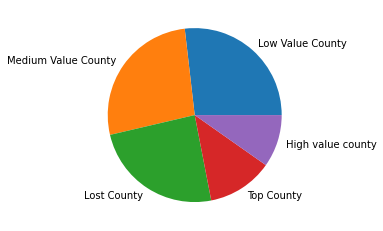

In [48]:
plt.pie(rfm_wine.County_segment.value_counts(),
        labels=rfm_wine.County_segment.value_counts().index)
plt.show()

In [46]:
import numpy as np
import sklearn.model_selection as ms
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


X = wine[['Year','CountyCode','HarvestedAcres','Yield','Production','Price']] 
y = wine['Value']

from sklearn import preprocessing
from sklearn import utils

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

Y = y_transformed 
XTrain, XTest, YTrain, YTest = ms.train_test_split(X, Y, test_size= 0.3, random_state=1)

depth_val = np.arange(1,5)
leaf_val = np.arange(3,35, step=9)

grid_s = [{'max_depth': depth_val,'min_samples_leaf': leaf_val}]
model = tree.DecisionTreeClassifier(criterion='entropy')

cv_tree = GridSearchCV(estimator=model,param_grid=grid_s,cv=ms.KFold(n_splits=50))
cv_tree.fit(XTrain, YTrain)

best_depth = cv_tree.best_params_['max_depth']

best_min_samples = cv_tree.best_params_['min_samples_leaf']

print(best_depth, best_min_samples)

4 30


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [36]:
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [37]:
print(predictions)

[3.8450400e+07 5.3425000e+07 8.7300000e+05 1.7586000e+06 6.9980000e+05
 1.5120000e+06 2.7650000e+06 1.6212000e+07 1.8008000e+07 8.8600000e+05
 2.9027900e+08 3.8795000e+07 2.8611000e+07 1.5120000e+06 4.0270000e+05
 1.0400000e+05 1.1240190e+08 4.0596000e+06 1.3820000e+05 1.1480183e+07
 1.5494200e+08 5.3270000e+06 8.5311000e+07 1.5882480e+08 7.9020000e+05
 8.5311000e+07 2.8400000e+05 1.8303000e+07 4.6327000e+07 2.5500000e+05
 3.0230000e+06 1.1869200e+08 1.1098420e+07 1.3375000e+07 5.1200000e+05
 2.1541600e+08 2.7650000e+06 1.4500000e+06 1.3873000e+07 3.7642230e+08
 1.1897500e+08 9.4052000e+07 1.5120000e+06 1.9570000e+06 5.7700792e+07
 4.2065000e+07 5.3270000e+06 1.2230660e+08 2.0531000e+06 2.4290000e+08
 1.8420200e+08 1.3635000e+07 3.6820750e+06 3.8450400e+07 7.3660000e+07
 1.5229000e+06 1.7940000e+06 6.9559000e+07 1.8396000e+07 1.5163000e+08
 5.0467000e+06 2.9920000e+05 4.0596000e+06 2.4567000e+07 2.9390000e+06
 3.2400000e+04 4.5650000e+07 3.8460000e+08 1.1116100e+07 1.5771000e+07
 1.346

In [38]:
X_test

,Year,CountyCode,HarvestedAcres,Yield,Production,Price
533,2011.0,33.0,8180.0,4.16,34000.0,1176.26
429,1996.0,99.0,13560.0,8.47,114900.0,421.00
1176,2020.0,103.0,138.0,4.23,584.0,1804.79
921,1990.0,95.0,1234.0,6.24,7702.0,553.00
1143,1994.0,57.0,174.0,3.92,682.0,701.00
...,...,...,...,...,...,...
759,1989.0,65.0,2274.0,4.45,10119.0,641.00
229,1989.0,53.0,32646.0,2.74,89400.0,673.00
817,2006.0,17.0,1864.0,3.07,5720.0,1081.56
529,1992.0,79.0,8327.0,5.01,41744.0,818.00


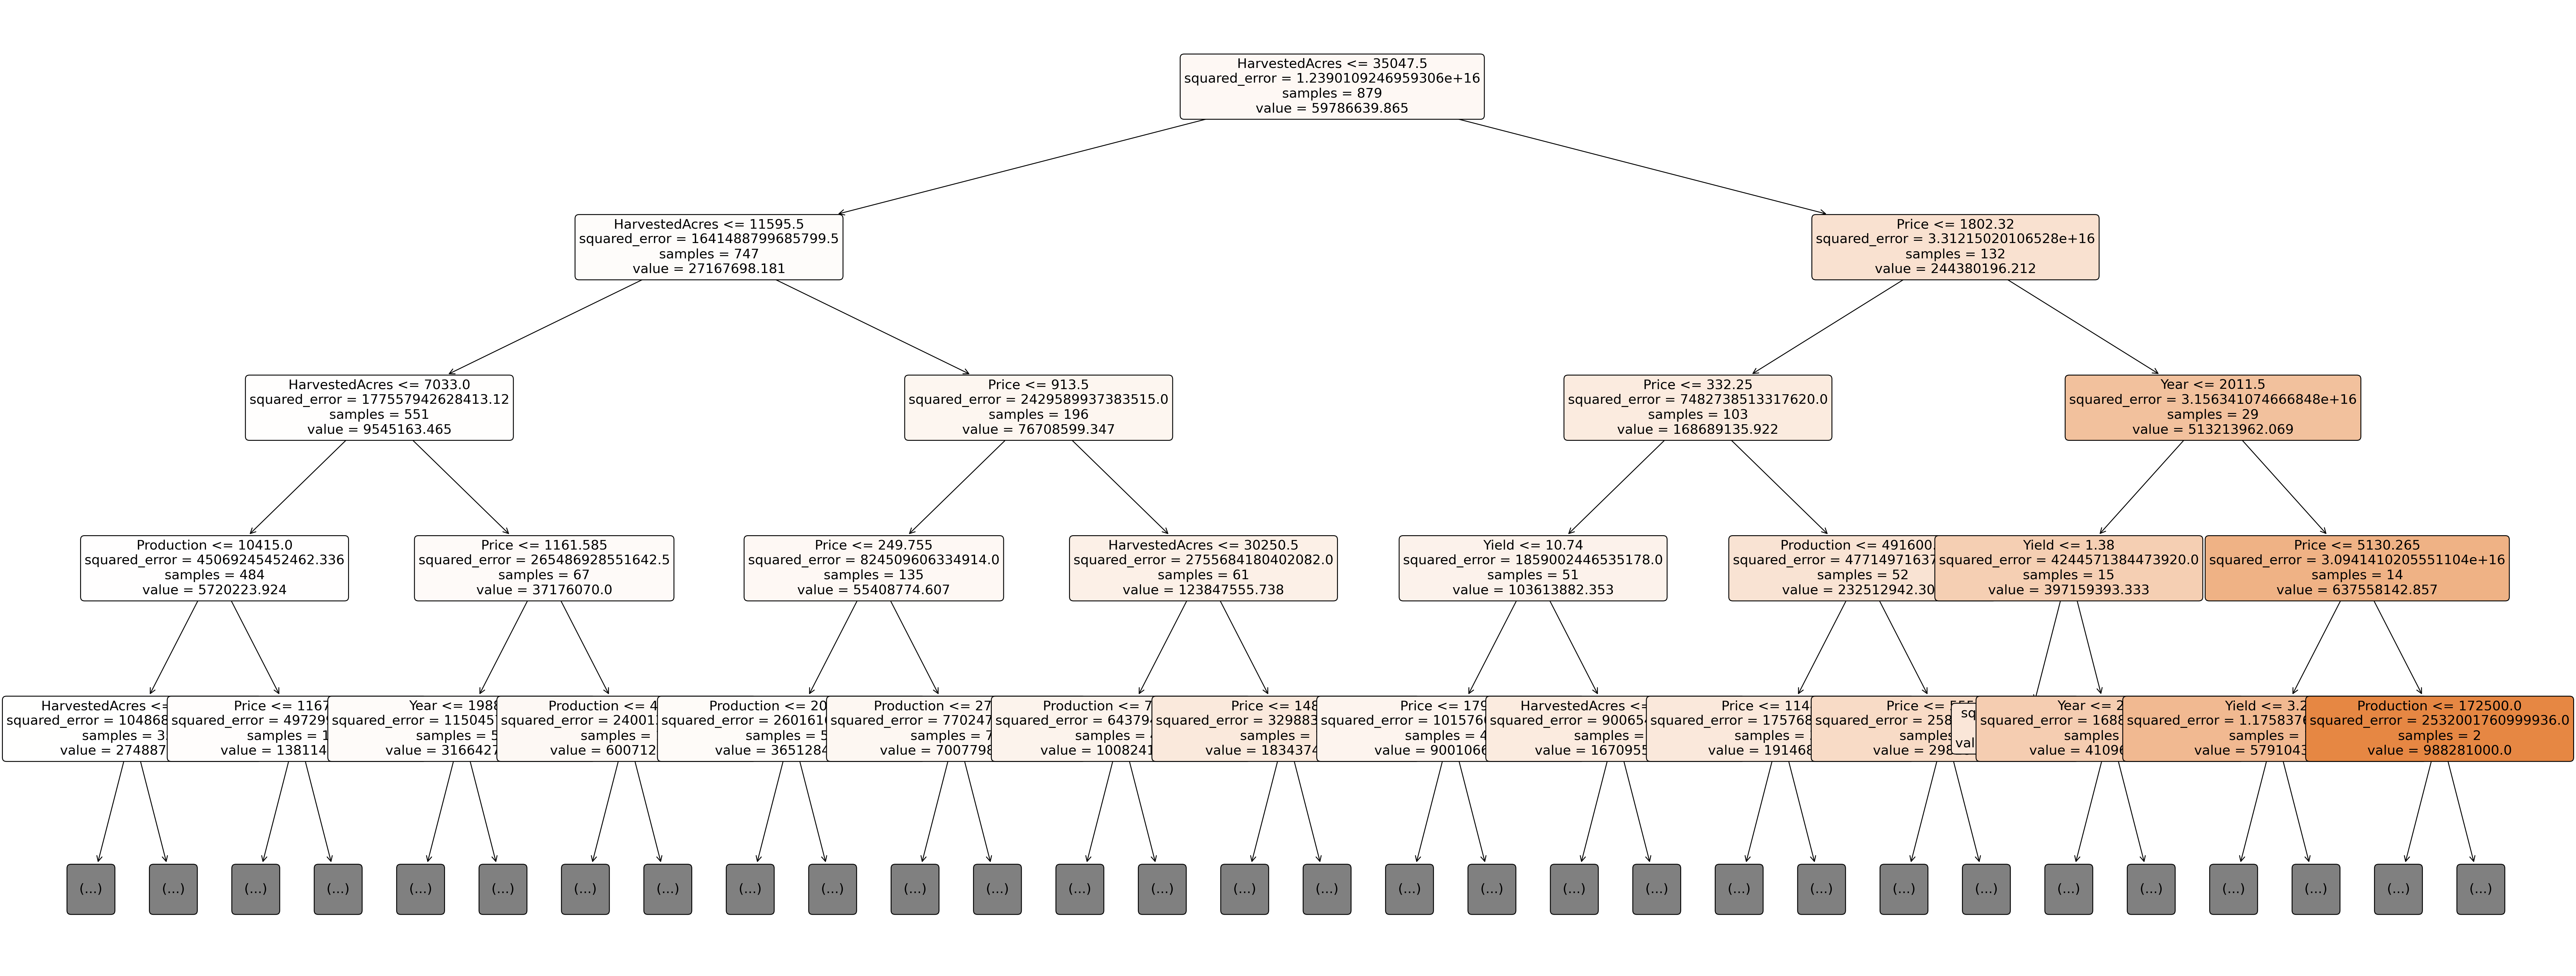

In [40]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(50,20), dpi=200)
plot_tree(decision_tree=model, feature_names=X.columns, class_names=None, filled=True, rounded=True, fontsize=15, max_depth=4) #adjust the dpi to the parameter that fits best your output
#plt.savefig('decision_tree.png')#save the tree image in png format
plt.show()